<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/DS_C6_SC2_JesusAdrianAguilarPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import OneHotEncoder,MinMaxScaler,normalize,OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, metrics


Carga los datos del archivo y limpiando datos

In [2]:
train=pd.read_csv('Train.csv')
num_cols = ['Age', 'Time_of_service', 'VAR2', 'VAR4','Pay_Scale']
train[num_cols] = train[num_cols].fillna(train[num_cols].mean())
cat_cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits','Education_Level', 'Post_Level', 'Work_Life_balance','VAR1','VAR4', 'VAR5', 'VAR6', 'VAR7']
imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = imputer.fit_transform(train[cat_cols])
train = train.drop(columns=['Employee_ID'])
train.head()
train.isnull().sum()
X = train.to_numpy()


Transforma los datos según las características de las variables:
Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc.


Agrupar columnas segun su tipo

Variables categoricas

In [3]:
scaler = StandardScaler()

In [4]:
X_train =train[['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']]
enc = OneHotEncoder()
enc.fit(X_train)
X2 = enc.transform(X_train).toarray()
X2

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

Variables ordinales

In [5]:
Y_train =train[['Education_Level', 'Post_Level', 'Work_Life_balance']]
Y2 = OrdinalEncoder().fit_transform(Y_train)
Y2


array([[3., 0., 2.],
       [2., 2., 3.],
       [2., 1., 0.],
       ...,
       [2., 1., 3.],
       [2., 4., 1.],
       [2., 3., 2.]])

Variables numericas

In [6]:
Z2=train[['Age', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Pay_Scale', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']]
Z2= Z2.to_numpy()
Z2 = scaler.fit_transform(Z2)
Z2

array([[ 0.18009898, -0.91505508,  1.42072449, ..., -1.80495079,
        -0.27776175, -0.02840599],
       [-1.18359795, -0.81755388,  1.42072449, ..., -1.80495079,
        -0.27776175, -0.65885713],
       [ 1.39227403,  1.32747267,  0.5506395 , ...,  0.77197263,
        -0.27776175, -0.56140908],
       ...,
       [ 0.71042557, -0.33004784, -1.18953047, ...,  0.77197263,
        -0.27776175,  3.20514613],
       [ 0.55890369,  1.03496905, -1.18953047, ..., -0.94597631,
        -0.27776175,  1.22119016],
       [ 1.39227403,  0.83996664, -0.31944549, ..., -1.80495079,
        -0.27776175, -0.52964425]])

In [7]:
print(X2.shape, Y2.shape, Z2.shape)

(7000, 30) (7000, 3) (7000, 14)


In [8]:
x = np.concatenate((X2, Y2, Z2), axis=1)
x



array([[ 1.        ,  0.        ,  1.        , ..., -1.80495079,
        -0.27776175, -0.02840599],
       [ 0.        ,  1.        ,  0.        , ..., -1.80495079,
        -0.27776175, -0.65885713],
       [ 1.        ,  0.        ,  1.        , ...,  0.77197263,
        -0.27776175, -0.56140908],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.77197263,
        -0.27776175,  3.20514613],
       [ 1.        ,  0.        ,  1.        , ..., -0.94597631,
        -0.27776175,  1.22119016],
       [ 1.        ,  0.        ,  1.        , ..., -1.80495079,
        -0.27776175, -0.52964425]])

Selecciona el número de grupos adecuados para agrupar usando K-means:
Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.
Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.



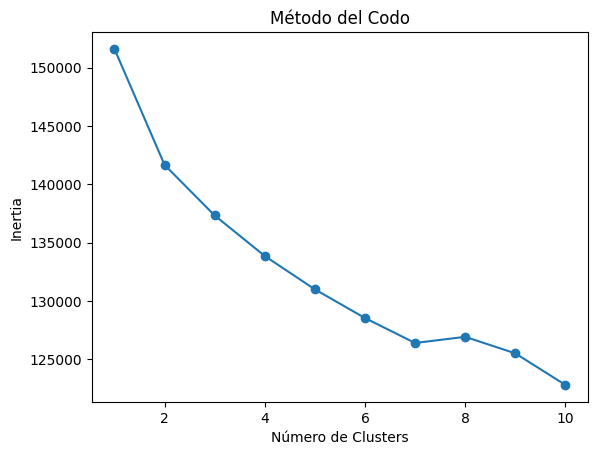

In [9]:
Elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    Elbow.append(kmeans.inertia_)

plt.plot(range(1, 11), Elbow, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.
- de acuerdo a elbow graphic el agrupamiento correcto es de 6 grupos

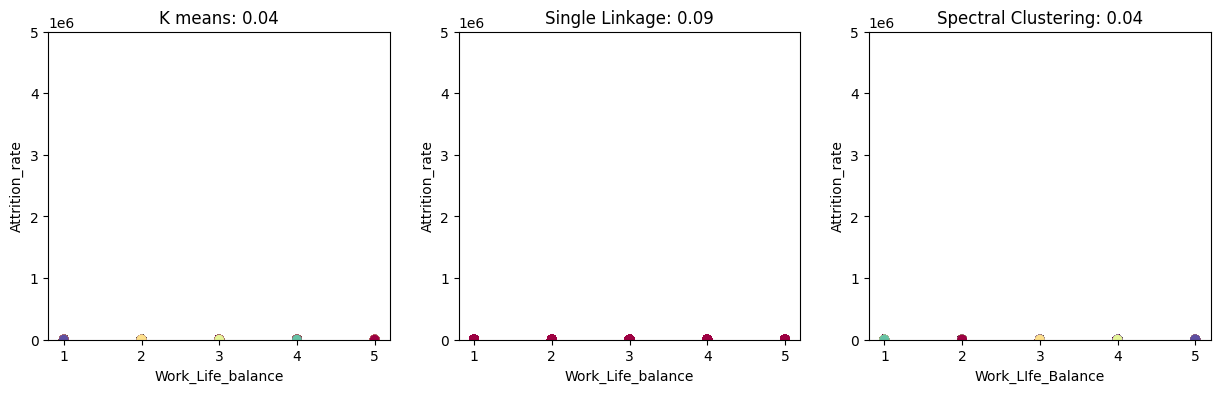

In [10]:
k = 6  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(x)
s1 = metrics.silhouette_score(x, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(x)
s2 = metrics.silhouette_score(x, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3 = spectral.fit_predict(x)
s3 = metrics.silhouette_score(x, y_pred3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.scatter(X[:, 14], X[:, 22], c=y_pred1, cmap=plt.cm.Spectral)
ax0.set_ylim(0, 0.5e7)
ax0.set_title('K means: '+"{:.2f}".format(s1))
ax0.set_xlabel('Work_Life_balance')
ax0.set_ylabel('Attrition_rate')

ax1.scatter(X[:,14], X[:,22], c=y_pred2, cmap=plt.cm.Spectral)
ax1.set_title('Single Linkage: '+"{:.2f}".format(s2))
ax1.set_ylim(0, 0.5e7)
ax1.set_xlabel('Work_Life_balance')
ax1.set_ylabel('Attrition_rate')

ax2.scatter(X[:, 14], X[:,22], c=y_pred3, cmap=plt.cm.Spectral)
ax2.set_ylim(0, 0.5e7)
ax2.set_title('Spectral Clustering: '+"{:.2f}".format(s3))
ax2.set_xlabel('Work_LIfe_Balance')
ax2.set_ylabel('Attrition_rate')

plt.show()

In [11]:
train['groups'] = KMeans(n_clusters=k).fit_predict(x)
Atrittion = [train[train['groups']==g] for g in range(k)]
grouped = pd.DataFrame()
grouped['Features'] = train.columns[:-1]
for g in range(k):
    row = []
    for col in grouped['Features']:
        if Atrittion[g][col].dtype != 'object':
            row.append(np.round(Atrittion[g][col].mean(),2))
        else:
            row.append(Atrittion[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = row
grouped


,Features,Group0,Group1,Group2,Group3,Group4,Group5
0,Gender,F,F,F,F,F,F
1,Age,35.91,33.18,33.05,34.29,38.78,56.71
2,Education_Level,1,3,3,3,3,3
3,Relationship_Status,Married,Married,Married,Married,Married,Married
4,Hometown,Lebanon,Lebanon,Lebanon,Lebanon,Lebanon,Lebanon
5,Unit,IT,IT,IT,IT,IT,IT
6,Decision_skill_possess,Conceptual,Directive,Analytical,Behavioral,Directive,Directive
7,Time_of_service,10.28,8.07,7.97,8.72,12.36,27.77
8,Time_since_promotion,2.27,2.26,2.33,2.4,2.43,2.51
9,growth_rate,46.91,47.04,47.29,45.93,47.58,47.5


Interpreta los resultados obtenidos:
Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo.
Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.

In [12]:
import plotly.express as px
dfg = grouped.transpose()
dfg.columns = dfg.loc['Features']
dfg = dfg.drop('Features')
dfg = dfg.apply(pd.to_numeric, errors='coerce')
dfg = dfg[dfg.columns[1:46]]
fig = px.bar(dfg, title="Distribucion")
fig.show()

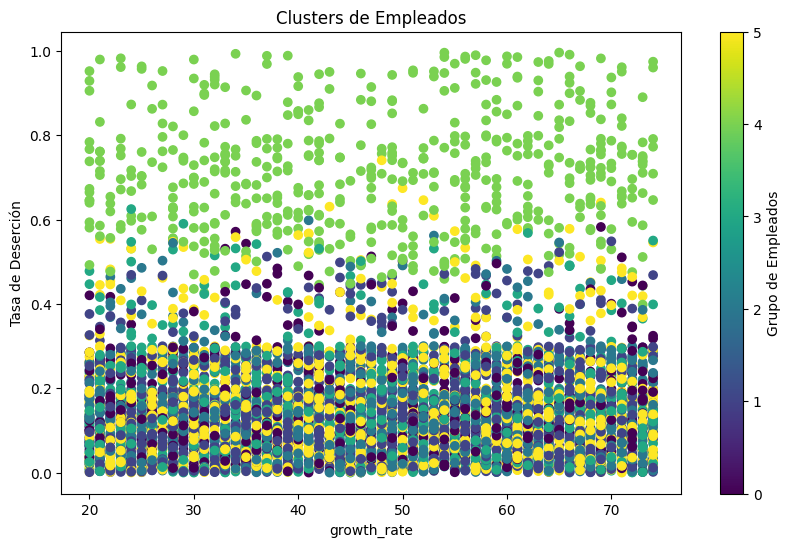

In [16]:
plt.figure(figsize=(10, 6))
sc= plt.scatter(train['growth_rate'], train['Attrition_rate'], c=train['groups'], cmap='viridis')
cbar = plt.colorbar(sc)
cbar.set_label("Grupo de Empleados")
plt.xlabel('growth_rate')
plt.ylabel('Tasa de Deserción')
plt.title('Clusters de Empleados')
plt.show()

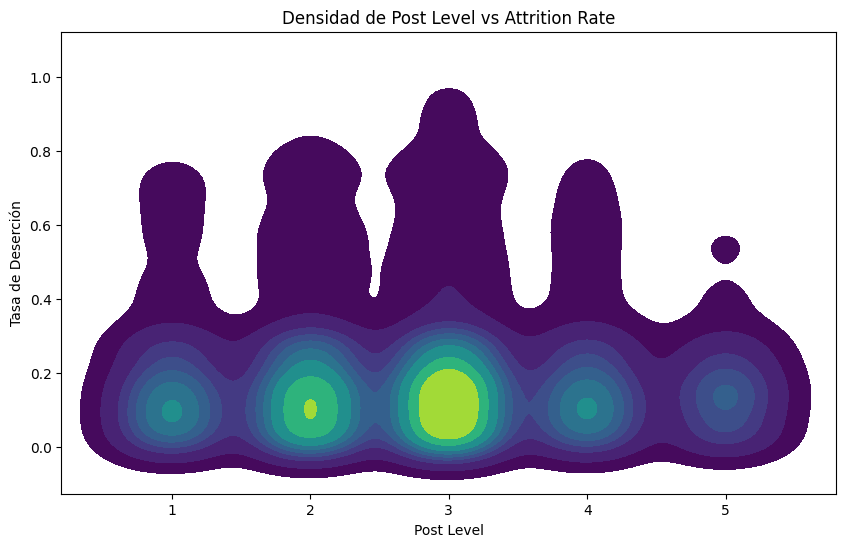

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=train['Post_Level'], y=train['Attrition_rate'], cmap="viridis", fill=True)

plt.xlabel('Post Level')
plt.ylabel('Tasa de Deserción')
plt.title('Densidad de Post Level vs Attrition Rate')

plt.show()

Basándonos en las visualizaciones y la tabla resumen, podemos observar que:
1) El grupo 4 tiene una tasa de disercion mucho mas alta de 0.71
2) El indice de crecimiento es lo mas importante para los 5 grupos de acuerdo al grafico.
3) Hay mayor cantidad de empleados en niveles 2 y 3 de puesto con baja disercion, en niveles extremos 1,4 y 5 hay menor densidad lo que indica que existe la posibilidad de que obtengan una mayor disercion en estos niveles

Recomendaciones:

1) Revisar el grupo 4 en el cual la relacion entre edad y desarrollo del empleado influyen en la alta disercion de empleados
2) Promover una estrategia de desarrollo dentro de la empresa y pautas claras para mejorar la tasa de disercion en la empresa.
3) Realizar una evaluacion de puestos y promover que se aumente la tasa de puestos nivel 3 para evitar la disercion laboral